Google Play Store Apps Exploratory Data Analysis Cohort A Team 5: Weifu Shi, Danting Huang, Xiaorui Shen, Hang Zhang, Shangshang Zhao

Context: Using listing data from GoogleApp, we will analyze the major factors that impact the popularity of Google apps and understanding how to get "High" rating on Play Store.

Problem:
1. What are the most popular categories in Google Play Store Apps? And what are the numbers of apps within each category?
2. Are there any low-rating apps but very popular(installs & reviews)?
3. What factors (size, charge type, ratings) affect the popularity of Google apps?
4. The number of installs of free-apps has outweighed paid-apps. Should the paid-apps developer reduce their fees to attract more customers? Are there any other ways which can improve their install-rate?
5. Would teenagers rate apps differently than 17+? Because young people are more likely to get addicted to entertainment 5. apps/games, would they give higher ratings to these apps compared to adults?
6. Are there any outdated apps based on its last_updated_time? If so, what are the number of them in each year?

Assignment Description: The descriptive and prescriptive analysis below provides a basic review of a few key factors that may contribute to identifying potential solutions to the problem above.

Data Source: Google Play Store Apps Dataset retrieved from the Kaggle website

In [1]:
%%bq query
SELECT * 
FROM `best-team-ever-249220.Project.Googleapp`
ORDER BY Rating DESC LIMIT 10

App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Year
Santa's Monster Shootout DX,GAME,5.0,4,33M,50,Paid,1.99,Teen,Action,"August 15, 2013",1.05,2.2 and up,2013
Nur təfsiri 1-ci cild,LIBRARIES_AND_DEMO,5.0,15,1.4M,1000,Free,0.0,Everyone,Libraries & Demo,"April 27, 2017",1,1.6 and up,2017
30WPM Amateur ham radio Koch CW Morse code trainer,FAMILY,5.0,1,3.7M,10,Paid,1.49,Everyone,Education,"May 18, 2018",2.0.2,2.1 and up,2018
USMLE Step 2 CK Flashcards,FAMILY,5.0,1,40M,10,Paid,19.99,Everyone,Education,"May 26, 2014",2.47,2.2 and up,2014
Story Time FD,FAMILY,5.0,2,4.2M,10,Free,0.0,Everyone 10+,Simulation,"March 25, 2016",1.1,1.6 and up,2016
AJ RETAILS,SHOPPING,5.0,9,169k,10,Free,0.0,Everyone,Shopping,"June 1, 2018",18060104,2.2 and up,2018
iCard BD Plus,SOCIAL,5.0,2,2.4M,500,Free,0.0,Everyone,Social,"July 15, 2016",3.7.5,2.0 and up,2016
Eternal life,LIBRARIES_AND_DEMO,5.0,26,2.5M,1000,Free,0.0,Everyone,Libraries & Demo,"May 24, 2018",1,1.6 and up,2018
DW Timer,TOOLS,5.0,9,1.5M,100,Free,0.0,Everyone,Tools,"April 5, 2017",1,1.6 and up,2017
Prosperity,EVENTS,5.0,16,2.3M,100,Free,0.0,Everyone,Events,"July 9, 2018",1.14,2.0 and up,2018


Dataset Summary: There are 7729 rows and 13 different columns in total. From the dataset, we focus on the rating of Google Apps based on a variety of factors, including size, price, and installs, so we rebuilt the query from selected columns. The dataset was updated six months ago and had high quality in accuracy, timeliness, and completeness.

Goole Playstore Rating Distribution

In [5]:
%%bq query -n rate
SELECT Rating FROM `best-team-ever-249220.Project.Googleapp` ORDER BY Rating

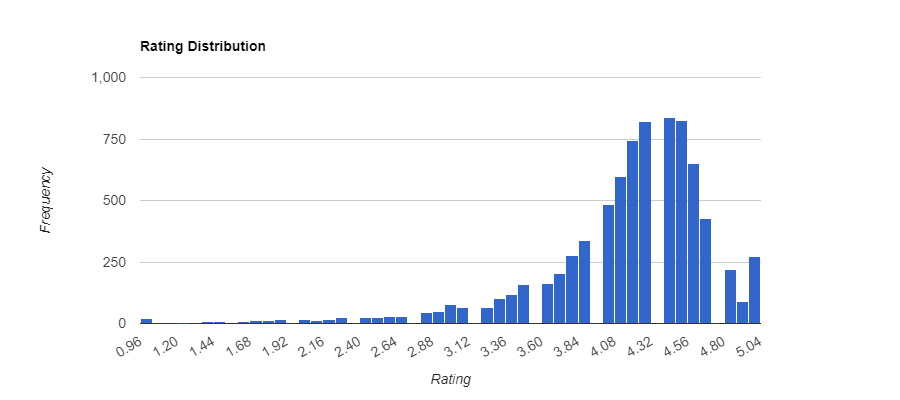

In [6]:
%%chart histogram -d rate
title: Rating Distribution
height: 400
width: 900
hAxis:
  title: Rating
vAxis:
  title: Frequency
legend: none

Through the rating histogram, we can see most ratings are above 4.0. In addition, we calculate the following statistics: mean, standard deviation, min, and max.

In [7]:
%%bq query
SELECT AVG(Rating) AS mean, STDDEV(Rating) AS deviation, MIN(Rating) AS min, MAX(Rating) AS max 
FROM `best-team-ever-249220.Project.Googleapp`

mean,deviation,min,max
4.17385172726,0.544562505334,1.0,5.0


Question1: What are the most popular categories in Google Play Store Apps? And what are the numbers of apps within each category?

In [2]:
%%bq query
SELECT Category, SUM(installs)as Sum_Install, SUM(Reviews)as Sum_Review,count(distinct App) as Num_Of_Apps
FROM `best-team-ever-249220.Project.Googleapp`
group by Category
order by Sum_install DESC, Sum_Review
LIMIT 10

Category,Sum_Install,Sum_Review,Num_Of_Apps
GAME,29874452717,1350232576,833
FAMILY,6798433580,291089694,1566
COMMUNICATION,4941915530,117104203,189
NEWS_AND_MAGAZINES,4251900550,9847296,154
TOOLS,3526053500,105280118,628
PRODUCTIVITY,2742302080,43585265,223
PHOTOGRAPHY,2557893130,76943394,204
SHOPPING,1504231540,46977854,146
SPORTS,1138911465,52571750,223
PERSONALIZATION,998142930,34950885,276


As we can see from the table, Game-sector has the greatest numbers of installations and reviews while Family-sector has the greatest number of applications. From this dataset, we can make an inference that Android users tend to use their phones to play games, manage family affairs, and communicate.

In [3]:
%%bq query -n Popularity_Of_The_App
SELECT Category, SUM(installs)as Sum_Install
FROM `best-team-ever-249220.Project.Googleapp`
group by Category
order by Sum_install DESC

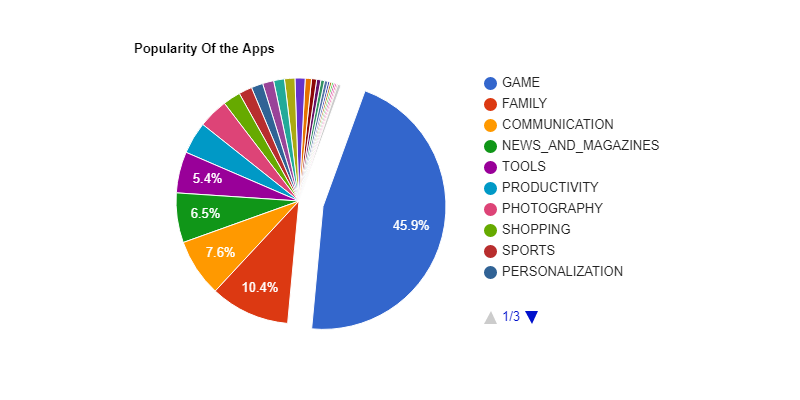

In [4]:
%%chart pie --fields Category,Sum_Install --data Popularity_Of_The_App
title: Popularity Of the Apps
height: 400
width: 800
pieStartAngle: 20
slices:
  0:
    offset: .2

In [2]:
%%bq query -n Apps_Count
SELECT Category, Count(App)as Apps_Count
FROM `best-team-ever-249220.Project.Googleapp`
group by Category
order by Count(App) DESC
Limit 10

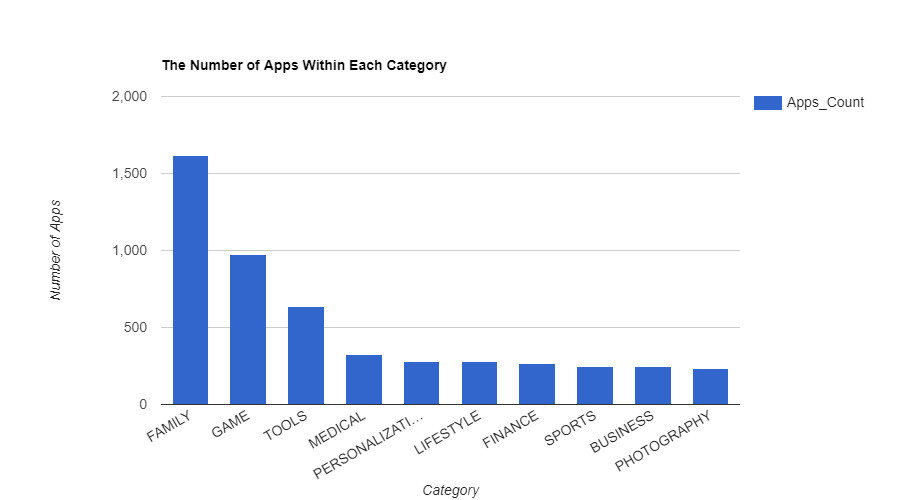

In [5]:
%%chart columns --data Apps_Count
title: The Number of Apps Within Each Category
height: 500
width: 900
hAxis:
  title: Category
vAxis:
  title: Number of Apps

From the column chart, family category has the greatest number of apps while the game has the second greatest and tools has the third greatest. Apps developers tend to target family-sector. According to Google Policy, all apps whose target audience are primarily consisted of kids should be categorized into family-sector. 

Question 2: Are there any low-rating apps but very popular(installs & reviews)?

In this step, we categorized the ratings into three rankings: High(above 4.0), Moderate(between 3.0 and 4.0), and Low(below 3.0). 

In [5]:
%%bq query
SELECT 
Distinct(App) AS Apps,Category,Rating,
CASE when rating>4.0  then 'High'
when rating >=3.0 And Rating<=4.0 then 'Moderate'
When rating <3.0 then 'Low'
End AS Rating_Rank 
FROM `best-team-ever-249220.Project.Googleapp` LIMIT 10

Apps,Category,Rating,Rating_Rank
[substratum] Vacuum: P,PERSONALIZATION,4.4,High
Pi Dark [substratum],PERSONALIZATION,4.5,High
My Style CM 13 Theme,PERSONALIZATION,4.5,High
Photo Collage - Layout Editor,PHOTOGRAPHY,4.5,High
ASUS Quick Memo,PRODUCTIVITY,4.5,High
Tamilnadu Electricity Info,TOOLS,3.6,Moderate
Bible du Semeur-BDS (French),BOOKS_AND_REFERENCE,4.5,High
4 in a row,GAME,4.3,High
.R,TOOLS,4.5,High
AH Alarm Panel,TOOLS,3.9,Moderate


After we ranked the ratings, we decided to calculate the number of rankings in each group. From the pie chart, the percentage of high-ranking apps is 69.2% and the moderate-ranking is 27% while the percentage of low-rating apps is 3.8%, in which we can make an inference that people are more likely to give high and moderate ratings and less likely to give out bad rankings in Google Play Store. 

In [30]:
%%bq query -n numberofrating
SELECT Rating_Rank,count(Rating_Rank)as Number_Of_Rating
from
(SELECT 
distinct App,Category,Rating,
CASE when rating>4.0  then 'High'
when rating >=3.0 And Rating<=4.0 then 'Moderate'
When rating <3.0 then 'Low'
End AS Rating_Rank 
FROM `best-team-ever-249220.Project.Googleapp` )
group by Rating_Rank
order by Number_Of_Rating DESC

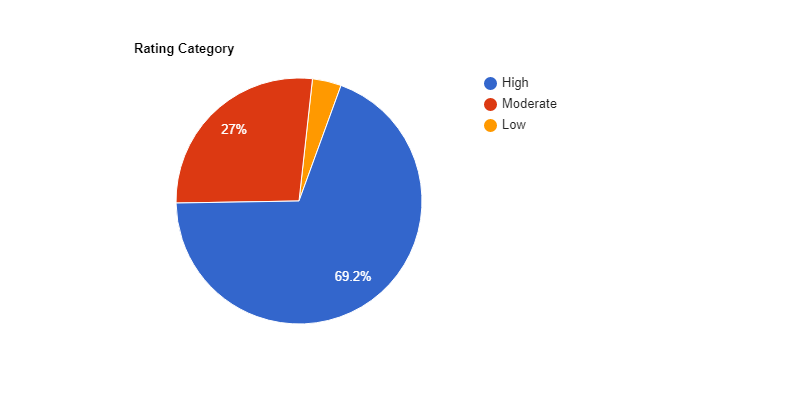

In [32]:
%%chart pie --data numberofrating
title: Rating Category
height: 400
width: 800
pieStartAngle: 20

Interestingly, we found out that there are some low-rating apps that have high installations and large number of reviews. 

In [6]:
%%bq query
SELECT Rating, App, Category, Installs, Reviews FROM `best-team-ever-249220.Project.Googleapp`
WHERE Rating < 3.0 ORDER BY Installs DESC, Reviews DESC, Rating LIMIT 10

Rating,App,Category,Installs,Reviews
2.9,3D Holograms Joke,FAMILY,5000000,31596
2.0,AppFinder by AppTap,TOOLS,5000000,2221
2.8,Club Penguin Island,FAMILY,1000000,107441
2.4,PS4 Second Screen,FAMILY,1000000,11773
2.8,How Old am I?,FAMILY,1000000,4635
2.5,BT Notifier,TOOLS,1000000,2794
2.2,CZ File Manager,TOOLS,1000000,876
2.2,Moto Z Market,TOOLS,1000000,605
2.9,Fossil Q,LIFESTYLE,500000,6627
2.7,Color by Disney,FAMILY,500000,5706


Select all low-rating apps from the dataset, then we listed their installs and reviews in descending order. From the result, we can see the first few apps are relatively popular even though they have low ratings.

Question 3: What factors (size, charge type, ratings) affect the popularity of Google apps? 

Scatter plot can help us see the relationship between two variables. We assumed the apps with a higher volume of installs are more popular. Therefore, we graphed several scatter plots to find the relationship between installs and other factors such as rating, price, and reviews. The following scatter plot shows the correlation between app ratings and installation times. In the scatter plot, the majority of the installs fall in the rating range of 3.0 and above. It is obvious to find out that the two factors have a positive correlation - the higher the ratings, the more the installations.

In [12]:
%%bq query -n rat
Select Rating, Installs
FROM `best-team-ever-249220.Project.Googleapp`
WHERE Installs < 1000000000
Order by Rating

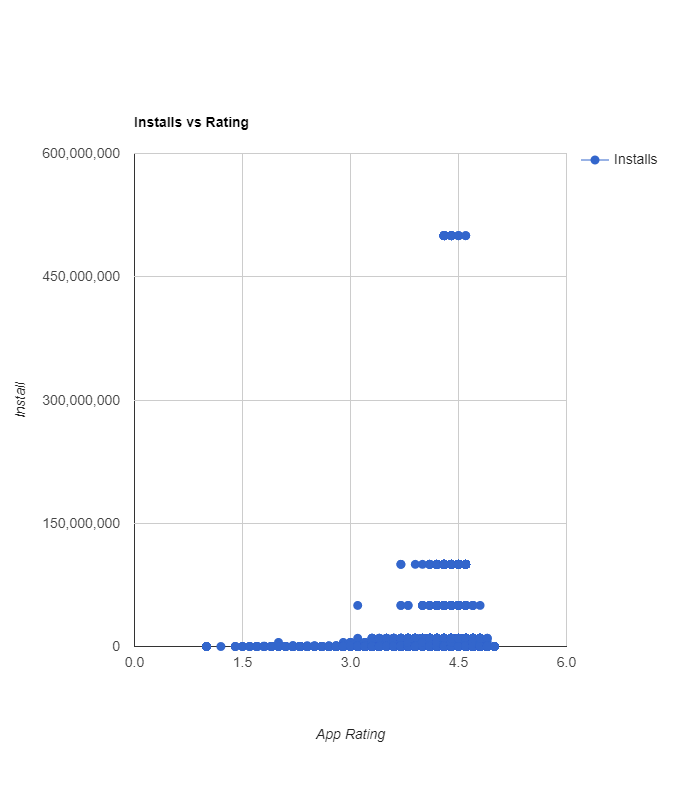

In [13]:
%%chart scatter --data rat
title: Installs vs Rating
height: 800
width: 700
hAxis:
  title: App Rating
vAxis:
  title: Install

The below scatter plot illustrates the relationship between the price of the app and the volume of installs. As the price of the apps gets higher, there are less installs. However, we are surprised to find out that over 10,000 people are still willing to pay $300+ for apps like "I'm rich - Trump Edition".

In [14]:
%%bq query -n price
Select Price, Installs 
FROM `best-team-ever-249220.Project.Googleapp`
WHERE Installs < 1000000
Order by Price

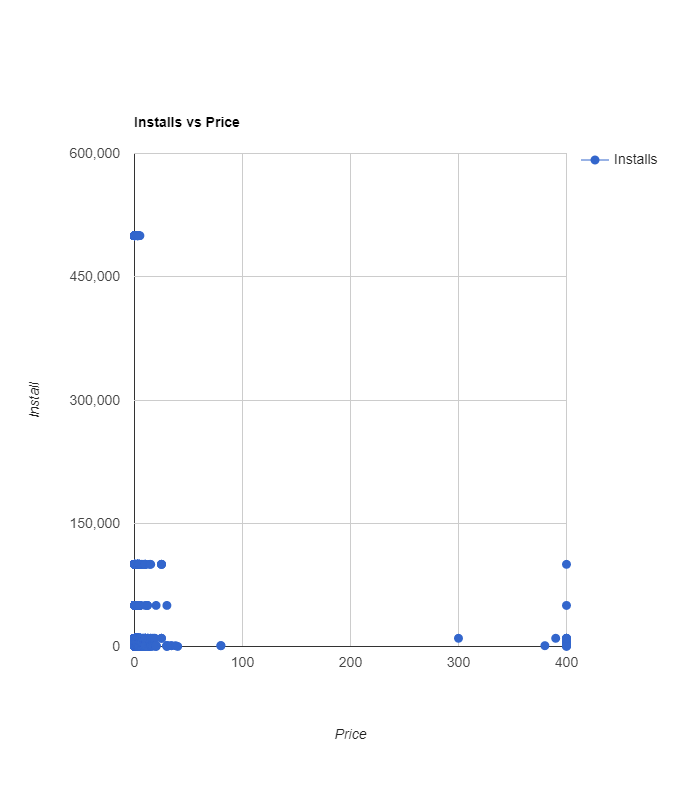

In [15]:
%%chart scatter --data price
title: Installs vs Price
height: 800
width: 700
hAxis:
  title: Price
vAxis:
  title: Install

In [16]:
%%bq query -n review
Select Reviews, Installs
FROM `best-team-ever-249220.Project.Googleapp`
Order by Reviews

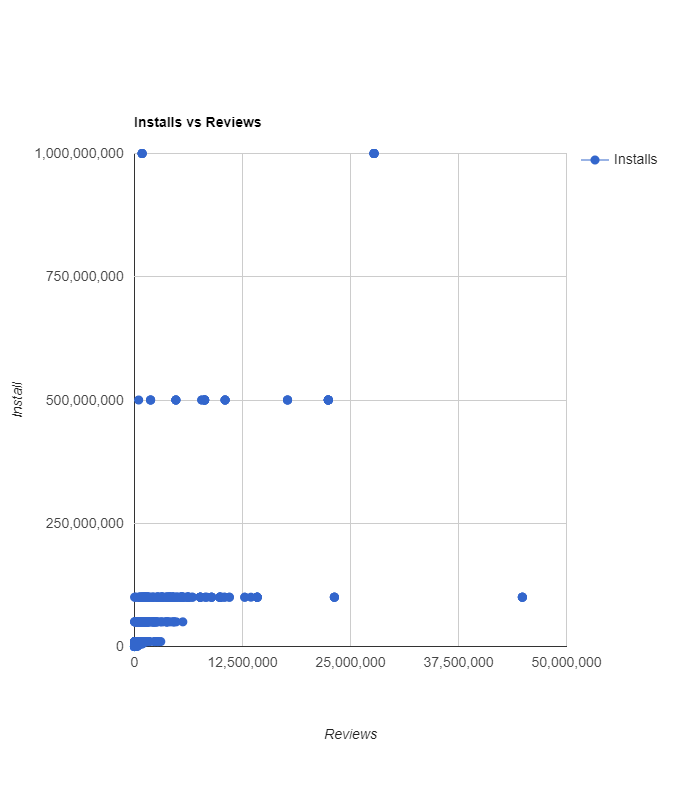

In [17]:
%%chart scatter --data review
title: Installs vs Reviews
height: 800
width: 700
hAxis:
  title: Reviews
vAxis:
  title: Install

However, the size of the apps and the number of reviews have little impact on installations, which indicates that holding other factors consistent, in general, people care less about the number of reviews when they decide to install the apps.

Question 4: The number of installs of free-apps has outweighed paid-apps. Should the paid-apps developer reduce their fees to attract more customers? Are there any other ways which can improve their install-rate?

In [21]:
%%bq query -n Sum_install
SELECT Type, sum(log(Installs)) AS sum_install_millions
FROM `best-team-ever-249220.Project.Googleapp`
GROUP BY Type

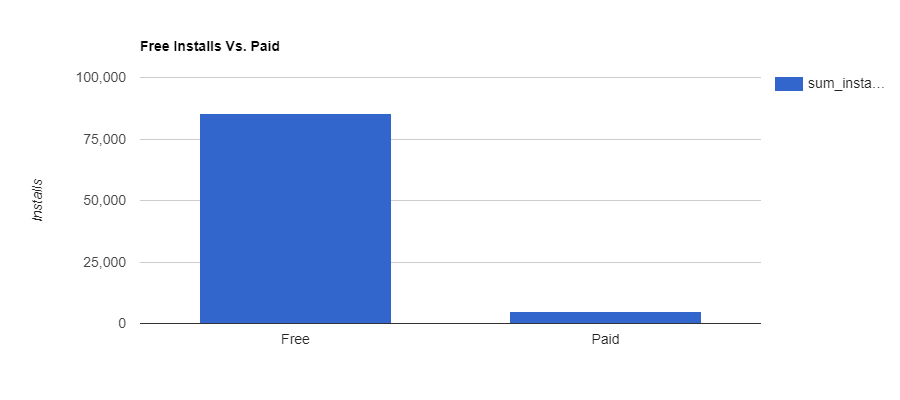

In [22]:
%%chart columns --data Sum_install
title: Free Installs Vs. Paid
height: 400
width: 900
vAxis:
  title: Installs

This graph shows that the install rate of free-apps is higher than paid-apps. If paid-app developers want to raise their install-rate, they have multiple ways to reach the goal. First, they could develop a subscription-fee system. These apps would be free for the basic version, but users would have to pay for advanced functions in apps (Example: Linkedin-Premium). Second, they could have a free-week trial open to users. Some of the paid apps would like to use a short time free plan to attract more users to download.

Question 5: Would teenagers rate apps differently than 17+? Because young people are more likely to get addicted to entertainment apps/games, would they give higher ratings to these apps compared to adults?

In [2]:
%%bq query -n Game_rating
SELECT Content_Rating,AVG(Rating) AS Avg_rating
FROM `best-team-ever-249220.Project.Googleapp`
WHERE Category = 'GAME' 
AND (Content_Rating = 'Teen' OR Content_Rating = 'Mature 17+')
GROUP BY Content_Rating

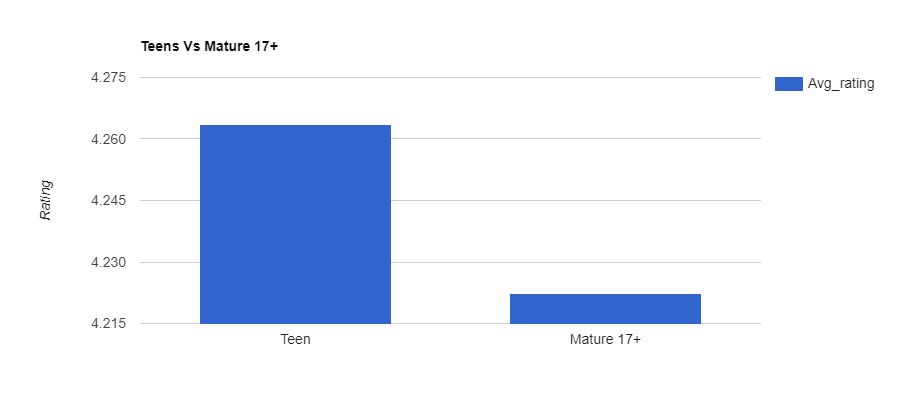

In [3]:
%%chart columns --data Game_rating
title: Teens Vs Mature 17+
height: 400
width: 900
vAxis:
  title: Rating

The column chart above is showing the teenagers' game rating versus adults' game rating. The Teen's average game rating is 4.264 and adults' rating is 4.222. After breaking down the data by different Content_rating, we can tell "Teens" rate games higher than adults. It is reasonable because teenagers are more likely to be addicted to games. However, Teen's average game rating is only a little higher than the mature's. Therefore, we also can conclude that game apps are very popular among people regardless of their age.

Question 6: Are there any outdated apps based on its last_updated_time? If so, what are the number of them in each year?

We defined the Apps that haven't been updated since 2018 as the outdated App and calculated the number of outdated App each year. 

In [8]:
%%bq query -n Outdated
SELECT Year,count(distinct(App))as number_of_outdate
FROM `best-team-ever-249220.Project.Googleapp` 
group by Year 
order by count(distinct(App)) DESC

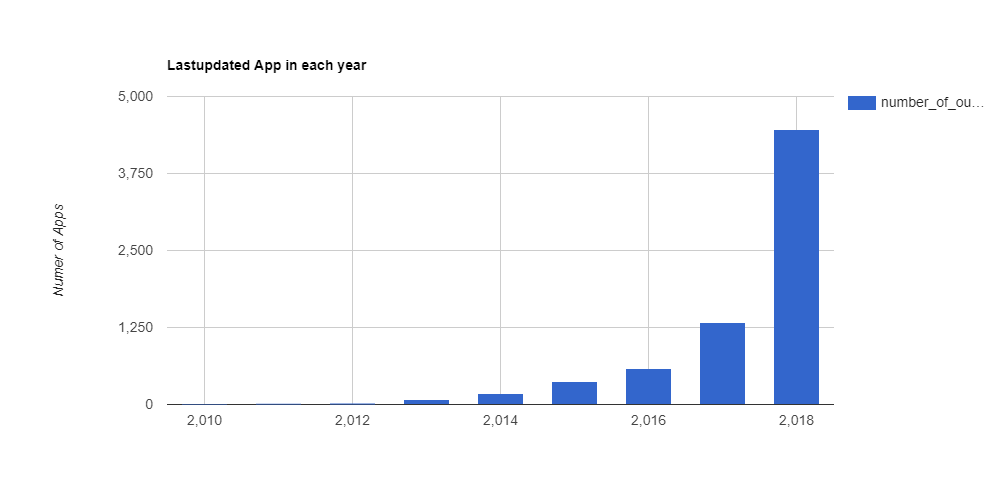

In [14]:
%%chart columns --data Outdated
title: Lastupdated App in each year
height: 500
width: 1000
vAxis:
  title: Numer of Apps

In [22]:
%%bq query 
SELECT COUNT(distinct(App))as total_number_of_outdate
FROM `best-team-ever-249220.Project.Googleapp` 
WHERE Year <> 2018

total_number_of_outdate
2574


The exponential rate of increasing updated-app in each year indicates a booming app market in recent year that more and more companies are entering the app market. Nowadays, to be more competitive and meet the need of the customers,  companies put more emphasis on developing the customer relationship by updating their apps in terms of reviews and feedbacks from customers.